In [17]:
from sklearn import datasets
base = datasets.load_digits()
entradas = base.data
saidas = base.target

In [18]:
entradas.shape

(1797, 64)

In [19]:
type(entradas)

numpy.ndarray

In [20]:
print(type(entradas))
print(type(saidas))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
saidas.shape

(1797,)

In [22]:
base.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [23]:
base.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
import matplotlib.pyplot as plt

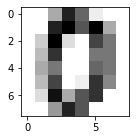

In [25]:
plt.figure(figsize=(2, 2))
plt.imshow(base.images[0], cmap=plt.cm.gray_r)

In [26]:
from sklearn.model_selection import train_test_split
e_treino, e_teste, s_treino, s_teste = train_test_split(entradas, saidas, test_size=0.1, random_state=2)

In [27]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(e_treino, s_treino)
previsor_svc = clf_svc.predict(e_teste)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acertos_svc = accuracy_score(s_teste, previsor_svc)
acertos_svc

0.9611111111111111

In [30]:
import numpy as np
import matplotlib.image as mimg

In [31]:
from google.colab import files
uploaded = files.upload()

Saving num2.png to num2.png


In [32]:
# imagem = mimg.imread('num2.png')

# fonte: https://stackoverflow.com/questions/41666627/using-own-image-in-sklearn-digits-example
imagem = mimg.imread('num2.png')
imagem

array([[[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [0.7529412 , 0.7529412 , 0.7529412 , 1.        ],
        [0.21176471, 0.21176471, 0.21176471, 1.        ],
        [0.43529412, 0.43529412, 0.43529412, 1.        ],
        [0.4392157 , 0.4392157 , 0.4392157 , 1.        ],
        [0.8627451 , 0.8627451 , 0.8627451 , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [0.9607843 , 0.9607843 , 0.9607843 , 1.        ],
        [0.43529412, 0.43529412, 0.43529412, 1.        ],
        [0.54509807, 0.54509807, 0.54509807, 1.        ],
        [0.7058824 , 0.7058824 , 0.7058824 , 1.        ],
        [0.8235294 , 0.8235294 , 0.8235294 , 1.        ],
        [0.7882353 , 0.7882353 , 0.7882353 , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [0

In [37]:
def rgb2gray(rgb):
    img_array = np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    img_array = (16 - (img_array * 16)).astype(int)
    img_array = img_array.flatten()
    return img_array

In [38]:
imagem16 = rgb2gray(imagem)
imagem16

array([ 0,  0,  0,  3, 12,  9,  8,  2,  0,  0,  9,  7,  4,  2,  3,  0,  0,
        3, 16, 14, 10,  1,  0,  0,  0,  0,  2,  1, 11, 16, 16,  0,  0,  0,
        0,  0,  0,  8, 13,  7,  0,  0,  0,  0,  5,  9,  9,  0,  5,  5,  3,
        0,  7, 12,  1,  0,  2, 13, 12,  8,  1,  0,  0,  0])

In [40]:
previsor_svc_num2 = clf_svc.predict([imagem16])
#previsor_svc_num2 = clf_svc.predict(imagem)
previsor_svc_num2

array([5])

In [42]:
identificador = SVC()
identificador.fit(entradas, saidas)
previsor_id = identificador.predict([rgb2gray(imagem)])
print(previsor_id)

[5]


In [43]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(e_treino, s_treino)
previsor_lr = clf_lr.predict(e_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
acertos_lr = accuracy_score(s_teste, previsor_lr)
acertos_lr

0.9333333333333333

In [45]:
previsor_lr_num2 = clf_lr.predict([imagem16])
previsor_lr_num2

array([5])